# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
api_key

'1be147c7bcd26debcfcf8de4672821da'

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#API call

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_number = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
Lat=[]
Lon=[]
ciudades=[]
k=0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Build query URL and request results
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get weather data
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if  weather_json["cod"] != "404":
    # Get responses from json
        city_number.append(weather_json["cod"])
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])  
        Lat.append(weather_json['coord']['lat'])
        Lon.append(weather_json['coord']['lon'])
        ciudades.append(city) 
    else:
        print(city + " not found. Skipping...")
        
    #Include a print log of each city as it's being processed with the city number and city name.
    print(f"Procesing record {k} city {city}")
    k=k+1


Procesing record 0 city hasaki
Procesing record 1 city dikson
Procesing record 2 city sao filipe
Procesing record 3 city atuona
Procesing record 4 city lavrentiya
Procesing record 5 city hualmay
Procesing record 6 city dandong
Procesing record 7 city antalaha
Procesing record 8 city manicaragua
Procesing record 9 city kaitangata
Procesing record 10 city ushuaia
Procesing record 11 city alice springs
Procesing record 12 city howard springs
sentyabrskiy not found. Skipping...
Procesing record 13 city sentyabrskiy
Procesing record 14 city svetlaya
mys shmidta not found. Skipping...
Procesing record 15 city mys shmidta
Procesing record 16 city cape town
Procesing record 17 city kapaa
Procesing record 18 city tiksi
Procesing record 19 city kirensk
Procesing record 20 city east london
Procesing record 21 city busselton
Procesing record 22 city kenai
Procesing record 23 city hilo
Procesing record 24 city clyde river
Procesing record 25 city san cristobal
Procesing record 26 city cherskiy
Proc

Procesing record 212 city meulaboh
Procesing record 213 city zaria
Procesing record 214 city flinders
Procesing record 215 city mugur-aksy
Procesing record 216 city verkhoyansk
Procesing record 217 city odienne
teneguiban not found. Skipping...
Procesing record 218 city teneguiban
Procesing record 219 city salalah
Procesing record 220 city richards bay
Procesing record 221 city jieshi
Procesing record 222 city aksarka
Procesing record 223 city luebo
Procesing record 224 city airai
Procesing record 225 city straumen
Procesing record 226 city saldanha
Procesing record 227 city ozinki
Procesing record 228 city luena
Procesing record 229 city saint-agapit
Procesing record 230 city chokurdakh
Procesing record 231 city portland
Procesing record 232 city tarma
Procesing record 233 city krasnogvardeyskiy
Procesing record 234 city dubti
Procesing record 235 city pontianak
Procesing record 236 city codrington
Procesing record 237 city gaomi
tingrela not found. Skipping...
Procesing record 238 ci

Procesing record 427 city pangnirtung
Procesing record 428 city strezhevoy
Procesing record 429 city zhezkazgan
Procesing record 430 city te anau
Procesing record 431 city palora
bardiyah not found. Skipping...
Procesing record 432 city bardiyah
Procesing record 433 city togur
Procesing record 434 city cidreira
Procesing record 435 city motril
Procesing record 436 city segou
Procesing record 437 city challans
Procesing record 438 city yoichi
Procesing record 439 city orsha
Procesing record 440 city rudnyy
Procesing record 441 city puerto carreno
Procesing record 442 city zolotonosha
Procesing record 443 city kassala
Procesing record 444 city kruisfontein
Procesing record 445 city roma
Procesing record 446 city seoul
Procesing record 447 city pauri
bolungarvik not found. Skipping...
Procesing record 448 city bolungarvik
Procesing record 449 city lere
Procesing record 450 city arco
Procesing record 451 city grand gaube
Procesing record 452 city tocopilla
Procesing record 453 city sal rei

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# DataFrame

weather_dict = {
    "city": ciudades,
    "Temperature": temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness, 
    "Wind speed": wind_speed, 
    "Lat": Lat, 
    "Lng": Lon }

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,Temperature,Humidity,Cloudiness,Wind speed,Lat,Lng
0,hasaki,58.86,87,75,8.05,35.73,140.83
1,dikson,10.83,87,100,6.69,73.51,80.55
2,sao filipe,81.48,70,0,17.18,14.90,-24.50
3,atuona,78.62,77,3,8.41,-9.80,-139.03
4,lavrentiya,34.07,94,100,25.52,65.58,-170.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

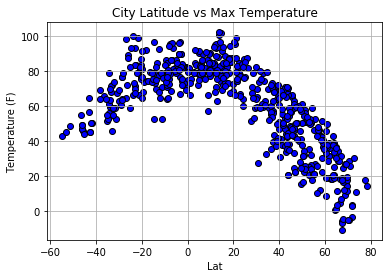

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Temperature"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Lat")
plt.grid()
plt.axis("auto")
plt.show()

#### Latitude vs. Humidity Plot

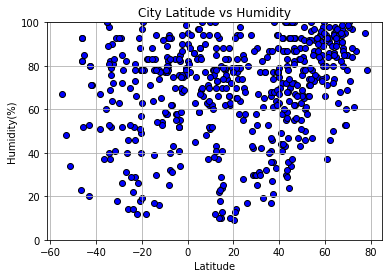

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
## Putting a limit as there were two extreme outliers
plt.ylim(0,100)
#plt.axis("auto")
plt.show()

#### Latitude vs. Cloudiness Plot

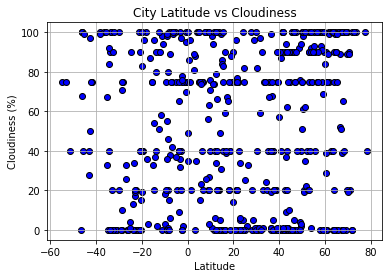

In [24]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.axis("auto")
plt.show()

#### Latitude vs. Wind Speed Plot

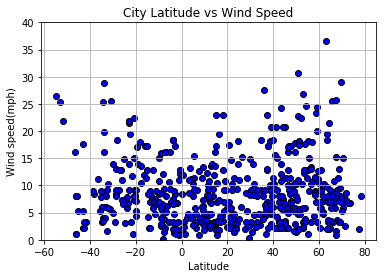

In [28]:
plt.scatter(weather_data["Lat"], weather_data["Wind speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid()
## Putting limit to get rid to two outliers
plt.ylim(0,40)
plt.show()